## <b>Understanding time series</b>

The methodology for time series analysis are:
- Advanced processing and visualization of time series data
- Statistical hypothesis testing to verify stationarity of a time series
- Time series decomposition for adjusting trends and seasonality

### <b>Advanced processing and visualization of time series data</b>

<b>Resampling</b> and <b>group-by</b> operations divide the original time series in non- overlapping chunks to find the aggregates.
Original time series needs: 
- Transformed into aggregate statistics. This would need resampling the observations over periods that are longer than the granular time indices in the original data.

- Computing aggregates over similar segments in the data.

- Continuous or running aggregates of the time series are required for analysis. The technique of computing aggregates over windows of successive time periods gives moving or rolling aggregates. 

<br>


The techniques are demonstrated with examples in the following three sub sections:
- Resampling time series data
- Performing group-by
- Calculating moving statistics

## Resampling time series data

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../Data Files/chemical-concentration-readings.csv')

In [3]:
# Let's see the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (197, 2)


In [4]:
# Let's see first 5 rows of the DataFrame
df.head(5)

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


In [5]:
# Parse the timestamp to datetime row index of the DataFrame
df = df.assign(
    Timestamp = pd.to_datetime(df.Timestamp, format='%Y-%m-%d %H:%M:%S')
)
df.index = df.Timestamp
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [6]:
# Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')

In [7]:
daily

In [8]:
daily_mean = daily.mean()

In [9]:
daily_mean.head(5)

Timestamp
1975-01-01    16.866667
1975-01-02    17.258333
1975-01-03    17.458333
1975-01-04    17.416667
1975-01-05    17.033333
Freq: D, Name: Chemical conc., dtype: float64

Text(0,0.5,'Chemical concentration')

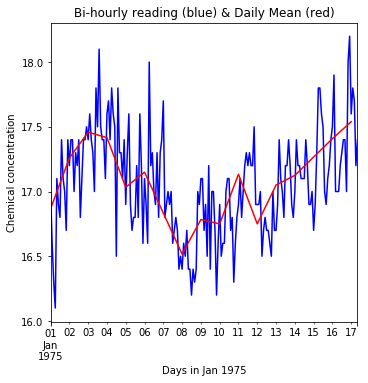

In [10]:
# Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

## Performing group-by period

In [11]:
# Load the DataFrame and re-index the row to datetime64 ../Data Files/
df = pd.read_csv(
    '../Data Files//mean-daily-temperature-fisher-river.csv',
    parse_dates = ['Date']
)

In [12]:
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [13]:
# Let's see first 5 rows
df.head(5)

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.0
1988-01-02,1988-01-02,-20.5
1988-01-03,1988-01-03,-22.0
1988-01-04,1988-01-04,-30.5
1988-01-05,1988-01-05,-31.0


In [14]:
# Display shape of the DataFrame
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1461, 2)


Text(0.5,1,'Mean daily temparature')

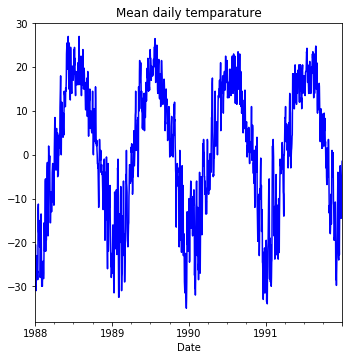

In [15]:
# Plot original time series on daily mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

In [16]:
# We need to groupby the data for every month 
# and find aggregate statistics
# Let's start by adding a Month_Year column
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

df.head(5)

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.0,01-1988
1988-01-02,1988-01-02,-20.5,01-1988
1988-01-03,1988-01-03,-22.0,01-1988
1988-01-04,1988-01-04,-30.5,01-1988
1988-01-05,1988-01-05,-31.0,01-1988


In [17]:
# Calculate month wise statistics
monthly_stats = df.groupby(
    by='Month_Year'
)['Mean temparature'].aggregate(
    [np.mean, np.median,np.std]
)
monthly_stats.head(5)

,mean,median,std
Month_Year,,,
01-1988,-22.137097,-23.0,5.260640
01-1989,-17.129032,-18.0,8.250725
01-1990,-15.112903,-12.0,6.606764
01-1991,-23.038710,-24.5,7.095570
02-1988,-19.025862,-19.5,8.598522


In [18]:
monthly_stats.reset_index(inplace=True)
monthly_stats.head(5)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.0,5.260640
1,01-1989,-17.129032,-18.0,8.250725
2,01-1990,-15.112903,-12.0,6.606764
3,01-1991,-23.038710,-24.5,7.095570
4,02-1988,-19.025862,-19.5,8.598522


In [19]:
monthly_stats['Month_Year'] = pd.to_datetime(monthly_stats['Month_Year'], format='%m-%Y')

In [20]:
monthly_stats['Year'] = monthly_stats['Month_Year'].dt.year
monthly_stats['Month'] = monthly_stats['Month_Year'].dt.month
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.reset_index(inplace=True, drop=True)
monthly_stats.head(5)

,Month_Year,mean,median,std,Year,Month
0,1988-01-01,-22.137097,-23.000,5.260640,1988,1
1,1988-02-01,-19.025862,-19.500,8.598522,1988,2
2,1988-03-01,-8.258065,-9.250,5.341459,1988,3
3,1988-04-01,2.641667,1.875,5.057720,1988,4
4,1988-05-01,11.290323,11.000,6.254364,1988,5


In [21]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']

Text(0.5,1,'Monthly statistics: Mean (blue) & Std. Dev. (red)')

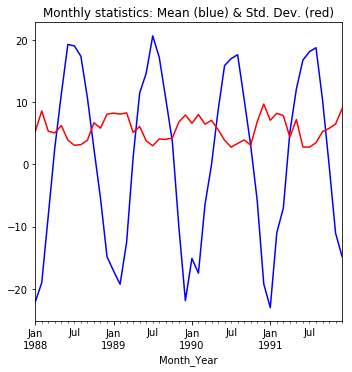

In [22]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

In [23]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [24]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [25]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

Text(0.5,1,'Monthly moving average with stride 2')

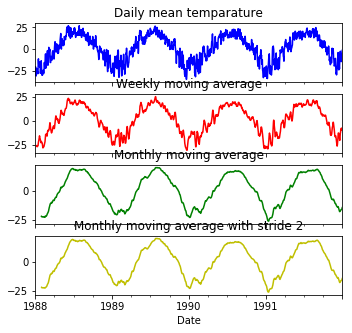

In [26]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

monthly_moving_average_2stride.plot(ax=axarr[3], color='y')
axarr[3].set_title('Monthly moving average with stride 2')